In [1]:
import torch
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv
load_dotenv()

from model_2D import GNNFingerprint2D
from train import train
from utils import change_graph_to_2D

import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(parent_dir)

from model.dataset import MoleculeGraphDataset

In [2]:
data_path = os.getenv("DATA_PATH")
models_path = os.getenv("MODELS_PATH")

similar_mol_path = os.path.join(data_path, "similar_mol.json")
final_df_dict_path = os.path.join(data_path, "final_df_dict.pkl")

In [ ]:
final_df = change_graph_to_2D(final_df_dict_path)
data = MoleculeGraphDataset(similar_mol_path, final_df, batch_size=512)

# Model
model = GNNFingerprint2D(node_input_dim=14)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Training
losses = train(model, data, optimizer, device, model_name="2D_GNN_MODEL", epochs=20)

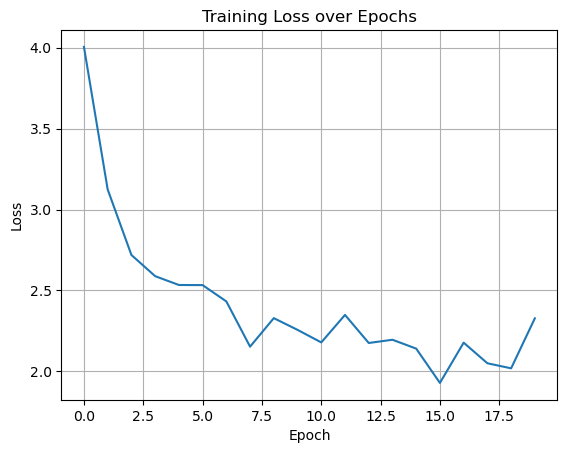

In [14]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()